In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [10]:
# set seaborn figure size
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [12]:
# lineweight
plt.rc('lines', linewidth=3)
# figure size
plt.rc('figure', figsize=(12, 7))
# title fontsize
plt.rc('axes', titlesize=33) 
# axes label fontsize
plt.rc('axes', labelsize=28)
# axes values fontsize
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
# legend fontsize
plt.rc('legend', fontsize=20)
plt.rcParams['legend.title_fontsize'] = 22

# Report Data

In [3]:
ufo_df = pd.read_csv('data/ufo_df.csv', index_col=0)
len(ufo_df)

45680

In [4]:
ufo_df.head()

,datetime,geolocation,season,month,day,time_of_day,region,shape,duration,report_text
report_id,,,,,,,,,,
073/S73909,2010-01-01 00:00:00,"Park City, KY",Winter,January,Friday,Night,East South Central,Light,3.0,"Lights orbiting the moon,I am 10,and i was wit..."
073/S73915,2010-01-01 00:00:00,"La Mesa, CA",Winter,January,Friday,Night,Pacific,Light,600.0,Three red lights over southern California that...
078/S78231,2010-01-01 00:00:00,"Benton, AR",Winter,January,Friday,Night,West South Central,Circle,300.0,4 bright green circles high in the sky going i...
073/S73918,2010-01-01 00:00:00,"El Cajon, CA",Winter,January,Friday,Night,Pacific,Triangle,720.0,"3 Red objects hovering over El Cajon CA ,Exit..."
073/S73916,2010-01-01 00:00:00,"Lemon Grove, CA",Winter,January,Friday,Night,Pacific,Light,900.0,3 Red lights in line pattern above El Cajon/ E...


In [5]:
# report topics
y = pd.read_csv('data/ufo_tops.csv', index_col=0, header=None, names=['topic'])['topic']
y.head()

073/S73909          Fiery Lights
073/S73915    Object Description
078/S78231    Object Description
073/S73918     Light Description
073/S73916    Object Description
Name: topic, dtype: object

## Target Data
### report topic

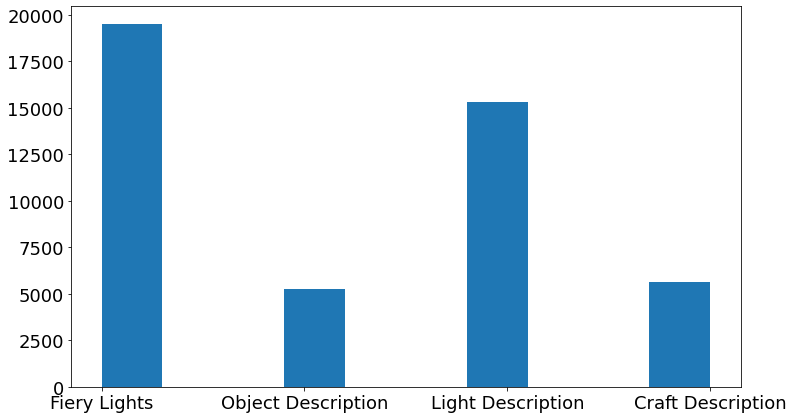

In [6]:
# topic histogram
plt.hist(y);

## Numerical Data

### duration

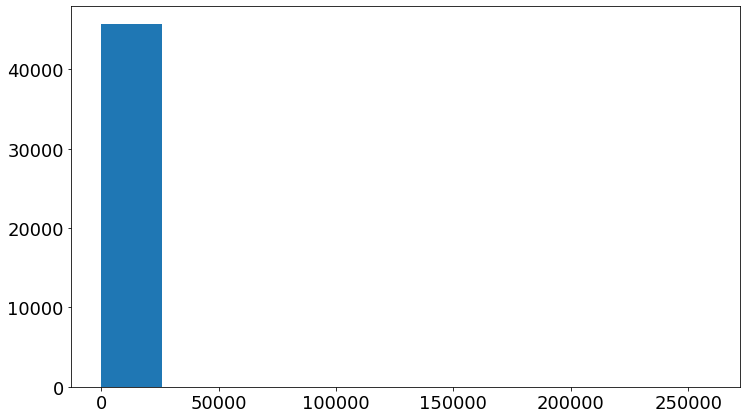

In [7]:
# duration of sighting
plt.hist(ufo_df['duration']);

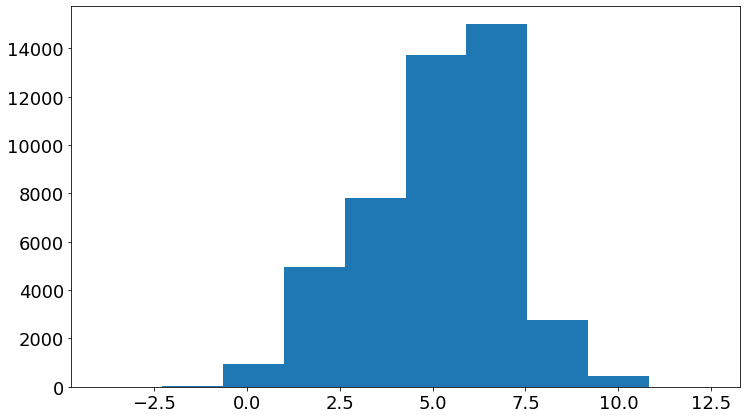

In [8]:
# log transformed duration
plt.hist(np.log(ufo_df['duration']));

## Categorical Data

### season

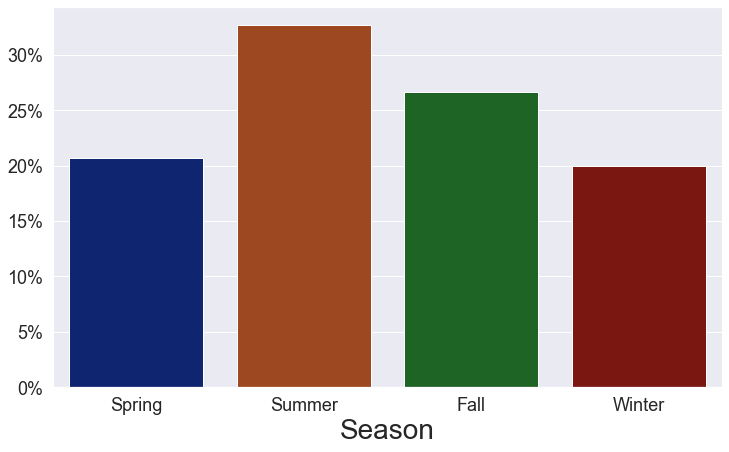

In [13]:
column = 'season'
data = ufo_df[column].value_counts() / ufo_df[column].value_counts().sum() * 100
order = ['Spring', 'Summer', 'Fall', 'Winter']
# bar plot
sea_plot = sns.barplot(
    x=data.index, 
    y=data.values, 
    order=order, 
    palette=sns.color_palette("dark", 10)    
)
# label x-axis
sea_plot.set(xlabel='Season')
# format y-axis as %
sea_plot.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
# save plot image
fig = sea_plot.get_figure()
# fig.savefig('img/seasons.png', bbox_inches='tight')

### month

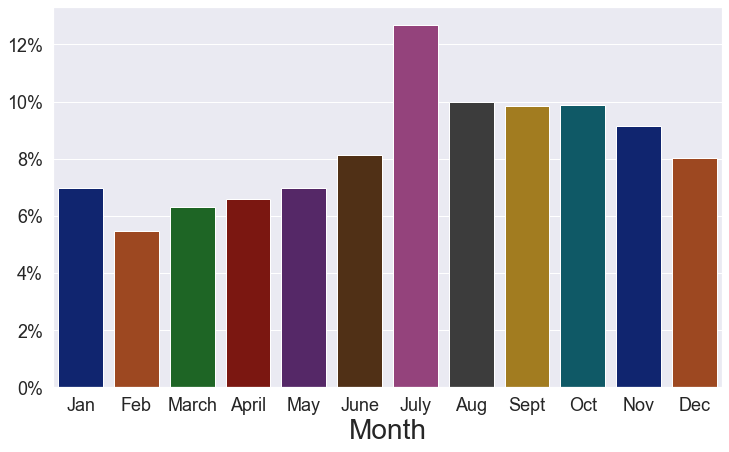

In [136]:
column = 'month'
data = ufo_df[column].value_counts() / ufo_df[column].value_counts().sum() * 100
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
         'September', 'October', 'November', 'December']
# bar plot
month_plot = sns.barplot(
    x=data.index, 
    y=data.values, 
    order=order, 
    palette=sns.color_palette("dark", 10)    
)
# label x-axis
month_plot.set(xlabel='Month')
# rename x tick labels
month_plot.set(xticklabels=['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 
         'Sept', 'Oct', 'Nov', 'Dec'])
# format y-axis as %
month_plot.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
# save plot image
fig = month_plot.get_figure()
# fig.savefig('img/months.png', bbox_inches='tight')

### day of week

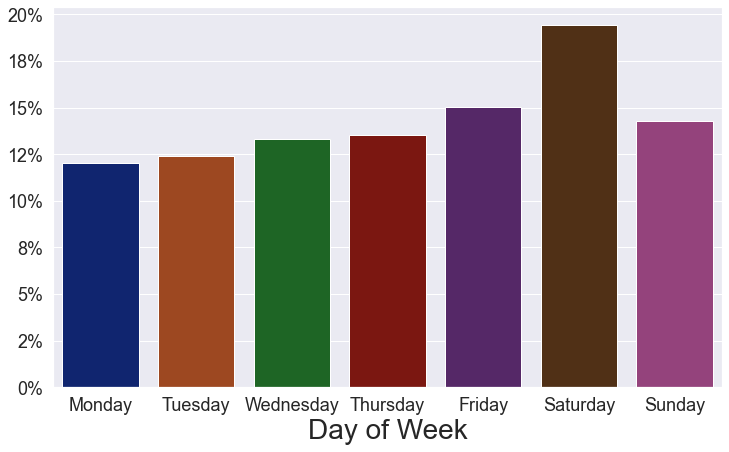

In [126]:
column = 'day'
data = ufo_df[column].value_counts() / ufo_df[column].value_counts().sum() * 100
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# bar plot
day_plot = sns.barplot(
    x=data.index, 
    y=data.values, 
    order=order, 
    palette=sns.color_palette("dark", 10)    
)
# label x-axis
day_plot.set(xlabel='Day of Week')
# format y-axis as %
day_plot.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
# save plot image
fig = day_plot.get_figure()
# fig.savefig('img/day.png', bbox_inches='tight')

### time of day

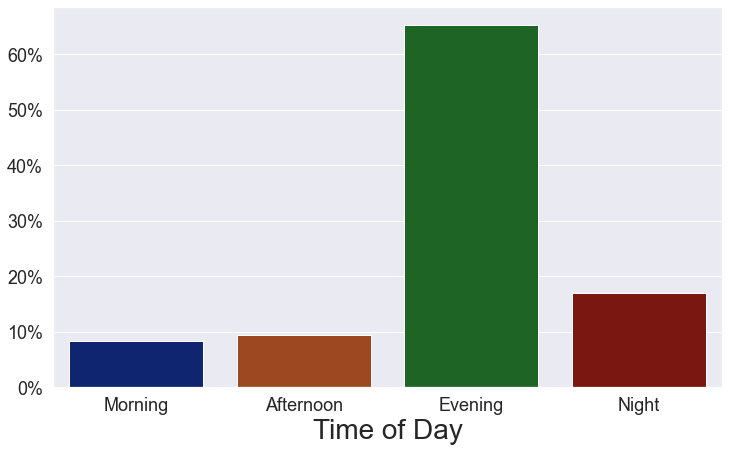

In [127]:
column = 'time_of_day'
data = ufo_df[column].value_counts() / ufo_df[column].value_counts().sum() * 100
order = ['Morning', 'Afternoon', 'Evening', 'Night']
# bar plot
time_plot = sns.barplot(
    x=data.index, 
    y=data.values, 
    order=order, 
    palette=sns.color_palette("dark", 10)    
)
# label x-axis
time_plot.set(xlabel='Time of Day')
# format y-axis as %
time_plot.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
# save plot image
fig = time_plot.get_figure()
# fig.savefig('img/time.png', bbox_inches='tight')

### geographical region

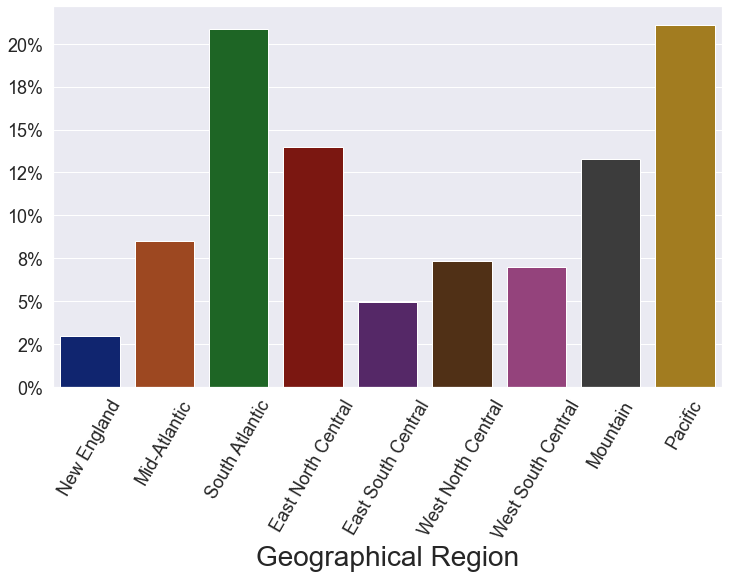

In [140]:
column = 'region'
data = ufo_df[column].value_counts() / ufo_df[column].value_counts().sum() * 100
order = ['New England', 'Mid-Atlantic', 'South Atlantic', 'East North Central', 
         'East South Central', 'West North Central', 'West South Central', 
         'Mountain', 'Pacific']
# bar plot
region_plot = sns.barplot(
    x=data.index, 
    y=data.values, 
    order=order, 
    palette=sns.color_palette("dark", 10)    
)
# label x-axis
region_plot.set(xlabel='Geographical Region')
# rotate x-axis labels
region_plot.set_xticklabels(region_plot.get_xticklabels(), rotation=60)
# format y-axis as %
region_plot.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
# save plot image
fig = region_plot.get_figure()
# fig.savefig('img/region.png', bbox_inches='tight')

### object shape

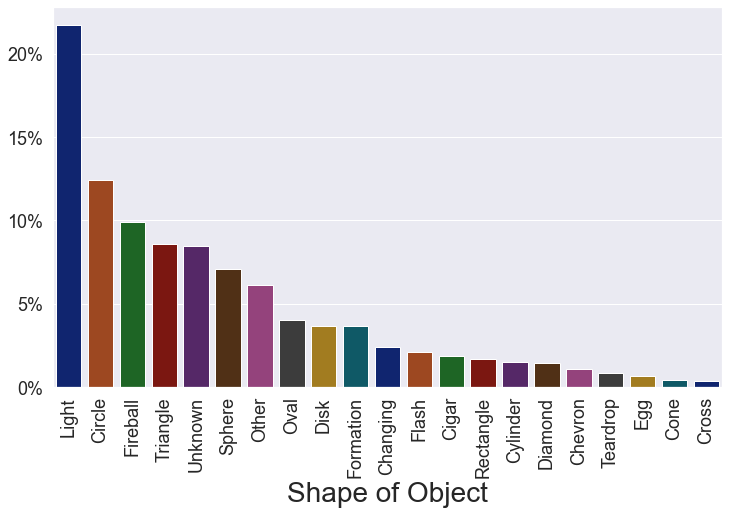

In [138]:
column = 'shape'
data = ufo_df[column].value_counts() / ufo_df[column].value_counts().sum() * 100
# bar plot
shape_plot = sns.barplot(
    x=data.index, 
    y=data.values,  
    palette=sns.color_palette("dark", 10)    
)
# label x-axis
shape_plot.set(xlabel='Shape of Object')
# rotate x-axis labels
shape_plot.set_xticklabels(shape_plot.get_xticklabels(), rotation=90)
# format y-axis as %
shape_plot.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
# save plot image
fig = shape_plot.get_figure()
# fig.savefig('img/shape.png', bbox_inches='tight')